In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re

In [ ]:
df = pd.read_csv("header_binary_matrix.csv")
list_df = df.columns.tolist()

In [ ]:
dic = {}

for i in range(len(list_df)):
  dic[i] = list_df[i]

In [ ]:
print(dic)

In [ ]:
my_dict = {0: 'SexF', 1: 'SexM', 2: 'Bebe', 3: 'Crianca', 4: 'Jovem', 5: 'Adulto', 6: 'Idoso', 7: 'Muito_idoso', 
           8: 'Conf_Fev', 9: 'Conf_Mar', 10: 'Conf_Abr', 11: 'Conf_Mai', 12: 'Conf_Jun', 13: 'Conf_Jul', 14: 'Conf_Ago', 
           15: 'Conf_Set', 16: 'Sint_Fev', 17: 'Sint_Mar', 18: 'Sint_Abr', 19: 'Sint_Mai', 20: 'Sint_Jun', 21: 'Sint_Jul', 
           22: 'Sint_Ago', 23: 'Sint_Set', 24: 'Evo_Rec', 25: 'Evo_Obito', 26: 'Evo_Aco', 27: 'Hosp_S', 28: 'Hosp_N', 
           29: 'Febre_S', 30: 'Febre_N', 31: 'Tosse_S', 32: 'Tosse_N', 33: 'Garganta_S', 34: 'Garganta_N', 35: 'Dispneia_S', 
           36: 'Dispneia_N', 37: 'Asma_S', 38: 'Asma_N', 39: 'DRespiratoria_S', 40: 'DRespiratoria_N', 41: 'DNeurologia_S', 
           42: 'DNeurologia_N', 43: 'Diabetes_S', 44: 'Diabetes_N', 45: 'Imunodef_S', 46: 'Imunodef_N', 47: 'DRenal_S', 
           48: 'DRenal_N', 49: 'DHepatica_S', 50: 'DHepatica_N', 51: 'DCardiaca_S', 52: 'DCardiaca_N', 53: 'Obesidade_S', 
           54: 'Obesidade_N'}

## Analysis

In [ ]:
# file = "./output_clustering/covid1_res_k2.txt"
# file = "./output_clustering/covid1_res_k3.txt"
# file = "./output_clustering/covid1_res_k4.txt"
# file = "./output_clustering/covid1_res_k5.txt"
file = "./output_clustering/covid1_res_k6.txt"
df_fimi = pd.read_csv(file, header=None, names=["transation"])
columnClusters,rowClusters = processDocument(df_fimi)
del df_fimi

In [ ]:
check_result(columnClusters,rowClusters)

## Co-clustering methods - scikit-learn
1) https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

2) https://scikit-learn.org/stable/modules/biclustering.html#biclustering

In [ ]:
file1 = "Toy1_b4_binary_forcocluster.dat"
path1 = './input_datasets/'+file1
file2 = "Toy1_b4_binary_fortraditional.dat"
path2 = './input_datasets/'+file2

df = pd.read_csv(path1,header=None)
df2 = pd.read_csv(path2,header=None)
data = df.values.copy()
data2 = df2.values.copy()
print(data.shape)
print(data2.shape)

fig , (ax1,ax2) = plt.subplots(1,2, figsize=(14,8))
fig.figsize = (19,19)
#plt.subplot(1,2,1)
#plt.matshow(data, cmap=plt.cm.Blues)
ax1.matshow(data, cmap=plt.cm.Blues,aspect="auto")
#plt.title("Binary dataset for co-clusters")
ax1.set_title("Binary dataset for co-clusters")

#plt.subplot(1,2,2)
#plt.matshow(data2, cmap=plt.cm.Blues)
ax2.matshow(data2, cmap=plt.cm.Blues,aspect="auto")
#plt.title("Binary dataset for traditional methods")
ax2.set_title("Binary dataset for traditional methods")

In [2]:
from sklearn.cluster.bicluster import SpectralCoclustering

/Users/ricardogiuliani/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
data = pd.read_csv('input_datasets/input_new.csv', header=None, sep=' ')
data.shape

(160940, 53)

In [6]:
clusters = 6
DhillonCocluster = SpectralCoclustering(n_clusters = clusters, random_state = 0)
DhillonCocluster.fit(data)

    
reconstructed_matrix = np.zeros(data.shape,dtype=int)
for nc in range(clusters):
    if len(DhillonCocluster.get_indices(nc)[0]) != 0 and len(DhillonCocluster.get_indices(nc)[1]) != 0:
        for i in DhillonCocluster.get_indices(nc)[0]:#Indices of rows in the dataset that belong to the bicluster.
            for j in DhillonCocluster.get_indices(nc)[1]:#Indices of columns in the dataset that belong to the bicluster.
                reconstructed_matrix[i][j] = 1

Text(0.5, 1.05, 'Dhillon output')

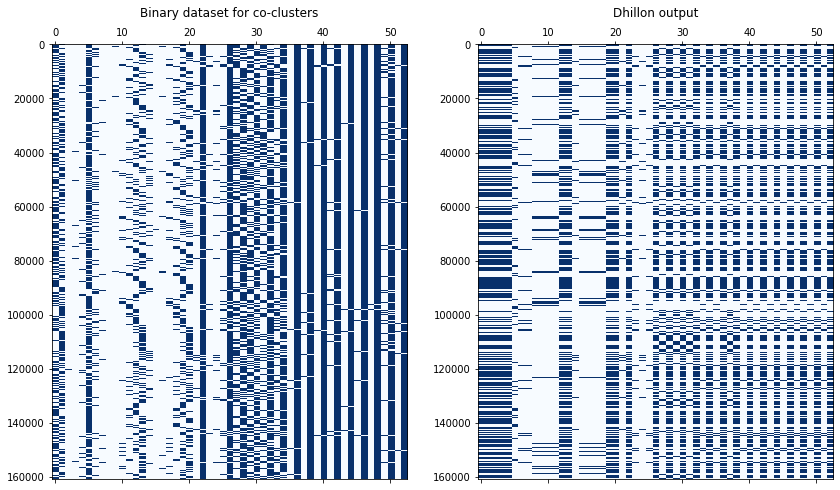

In [7]:
fig , (ax1,ax2) = plt.subplots(1,2, figsize=(14,8))
fig.figsize = (19,19)
#plt.subplot(1,2,1)
#plt.matshow(data, cmap=plt.cm.Blues)
ax1.matshow(data, cmap=plt.cm.Blues,aspect="auto")
#plt.title("Binary dataset for co-clusters")
ax1.set_title("Binary dataset for co-clusters")

#plt.subplot(1,2,2)
#plt.matshow(data2, cmap=plt.cm.Blues)
ax2.matshow(reconstructed_matrix, cmap=plt.cm.Blues,aspect="auto")
#plt.title("Binary dataset for traditional methods")
ax2.set_title("Dhillon output")

### Support methods

In [ ]:
def check_result(columnClusters,rowClusters):
    nc = len(columnClusters)
    for i in range(nc):
        num_objects = len(set(rowClusters[i]))
        print("Cluster-"+str(i+1)+" ("+str(num_objects)+")")
        print("Atributos: ",end="")
        for ele in columnClusters[i]:
            print(my_dict[int(ele)],end=", ")

        print("\nSobreposição de OBJETOS em outros clusters.")
        for j in range(nc):
            if i != j:
                print("    Cluster "+str(j+1)+": ",end="")
#                 clusB = len(set(rowClusters[i]))
                qtd_intersect = len(set(rowClusters[j]).intersection(set(rowClusters[i])))
#                 overlap = ((num_objects-(num_objects-qtd_intersect))/len(set(rowClusters[i]).union(set(rowClusters[j]))))*100
                overlap = ((num_objects-(num_objects-qtd_intersect))/num_objects)*100
#                 overlap = ((cluSize-(cluSize-qtd_intersect)))*100
                print("{0:.2f}% ({1:d})".format(overlap,qtd_intersect))
        print("\n")

In [ ]:
def processDocument(file):
    #print("Executing processDocument() method.")
    size_df = file.shape
    uniqueP = []
    uniqueT = []
    pois_per_cluster = []
    trajs_per_cluster = []
    change = 0
    
    for i in range(size_df[0]):#number of transations
        transationString = file.transation[i].split(' ')
#         print(transationString)
        pois = []
        trajs = []
        for j in range(len(transationString)):
            try:
                tmp = int(transationString[j])
            except:
                tmp = ''
            
            if change == 0:
                if type(tmp) is int:
                    if transationString[j] not in uniqueP:
                        uniqueP.append(transationString[j])
#                         if not pois: # empty
                    pois.append(transationString[j])
#                         print(transationString[j],end="|")
                else:
    #                 print("NO",end=" | ")
                    change = 1
#                     print("")
            else:
                if type(tmp) is int:
                    if transationString[j] not in uniqueT:
                        uniqueT.append(transationString[j])
                    trajs.append(transationString[j])
                else:
    #                 print("NO",end=" | ")
                    if change == 1:
                        change = 2
                        tmp = re.split('\[| |\]',transationString[j])
                        #print("1-tmp:"+str(tmp))
                        if tmp[1] not in uniqueT:
                            uniqueT.append(tmp[1])
                        trajs.append(tmp[1])
                    else:
                        tmp = re.split('\[| |\]',transationString[j])
                        #print("2-tmp:"+str(tmp))
                        if tmp[0] not in uniqueT:
                            uniqueT.append(tmp[0])
                        trajs.append(tmp[0])
                        change = 0
        pois_per_cluster.append(pois)
        trajs_per_cluster.append(trajs)

#     print('Number of unique elements: ',len(uniqueElements))
#     print("P per Clusters: "+str(pois_per_cluster))
#     print("T per Clusters: "+str(trajs_per_cluster))
    return pois_per_cluster,trajs_per_cluster